# Preliminaries

## Import packages

In [1]:
# import standard packages
from collections import defaultdict
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

# import single-cell packages
import cellrank as cr
import scanpy as sc
import velocyto as vcy
import scvelo as scv
import loompy
import pickle

## Print package versions for reproducibility

In [2]:
cr.logging.print_versions()
vcy.__version__

cellrank==1.5.0+gc8c2b9f6 scanpy==1.8.1 anndata==0.7.6 numpy==1.20.0 numba==0.54.0 scipy==1.7.1 pandas==1.3.2 pygpcca==1.0.2 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.6 scvelo==0.2.4 pygam==0.8.0 matplotlib==3.4.3 seaborn==0.11.2


'0.17.17'

## Set up paths

In [3]:
sys.path.insert(0, "../../../")  # this depends on the notebook depth and must be adapted per notebook

from paths import DATA_DIR, CACHE_DIR, FIG_DIR

## Set global parameters

Grid for number of nearest neighbors during imputation/transition probability estimation.

In [4]:
n_jobs = 8
ks = [15, 30, 50, 100, 200]

## Define utility functions

In [5]:
def load_data(fpath: str):
    ds = loompy.connect(fpath)
    vlm = object.__new__(vcy.VelocytoLoom)

    vlm.loom_filepath = None
    vlm.S = ds.layer["spliced"][:, :]
    vlm.U = ds.layer["unspliced"][:, :]
    vlm.A = None
    vlm.ca = dict(ds.col_attrs.items())
    vlm.ra = dict(ds.row_attrs.items())
    ds.close()
    del ds
    vlm.initial_cell_size = vlm.S.sum(0)
    vlm.initial_Ucell_size = vlm.U.sum(0)
    
    return vlm

def load():
    adata = cr.datasets.pancreas(DATA_DIR / "pancreas" / "pancreas.h5ad")
    adata.write_loom(DATA_DIR / "pancreas" / "pancreas.loom")
    
    vlm = load_data(DATA_DIR / "pancreas" / "pancreas.loom")
    vlm.ts = adata.obsm['X_umap']
    vlm.cluster_labels = adata.obs['clusters']
    vlm.colorandum = "black"
    
    return vlm, adata

# Run the grid search

The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


The loom file will lack these fields:
{'X_pca', 'X_umap'}
Use write_obsm_varm=True to export multi-dimensional annotations


This selects 21 principal components


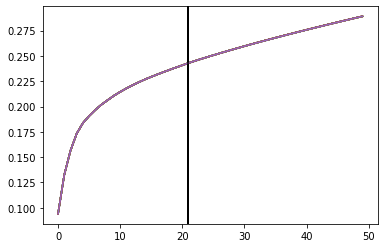

In [6]:
lns = defaultdict(dict)

for k_imp in ks:
    for k_t in ks:
        vlm, adata = load()
        
        vlm.score_detection_levels(min_expr_counts=15, min_expr_counts_U=10, min_cells_express=0)
        vlm.filter_genes(by_detection_levels=True)
        vlm.score_cv_vs_mean(3000)
        vlm.filter_genes(by_cv_vs_mean=True)

        vlm.normalize(size=True, log=True)
        
        vlm.perform_PCA(n_components=50)

        # use elbow heuristic to select the number of PCs
        n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002))[0][0]
        print(f"This selects {n_comps} principal components")

        plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_))
        plt.axvline(n_comps, c="k")
        
        vlm.knn_imputation(n_pca_dims=n_comps ,k=k_imp, balanced=False, n_jobs=n_jobs,
                           b_sight=np.minimum(k_imp * 8, vlm.S.shape[1] - 1),  # matters only for balanced
                           b_maxl=np.minimum(k_imp * 4, vlm.S.shape[1] - 1))  # matters only for balanced
        
        vlm.fit_gammas()
        vlm.predict_U()
        vlm.calculate_velocity()
        vlm.calculate_shift()
        vlm.extrapolate_cell_at_t()
        
        vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1, n_jobs=n_jobs,
                                     n_neighbors=k_t, knn_random=True, sampled_fraction=0.5)
        vlm.calculate_embedding_shift()
        vlm.calculate_grid_arrows(steps=(40, 40), n_neighbors=k_t)
        
        # Sample uniformly the points to avoid density driven effects - Should reimplement as a method
        if True:
            steps = 100, 100
            grs = []
            for dim_i in range(vlm.embedding.shape[1]):
                m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
                m = m - 0.025 * np.abs(M - m)
                M = M + 0.025 * np.abs(M - m)
                gr = np.linspace(m, M, steps[dim_i])
                grs.append(gr)

            meshes_tuple = np.meshgrid(*grs)
            gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T

            from sklearn.neighbors import NearestNeighbors
            nn = NearestNeighbors()
            nn.fit(vlm.embedding)
            dist, ixs = nn.kneighbors(gridpoints_coordinates, 1)

            diag_step_dist = np.sqrt((meshes_tuple[0][0,0] - meshes_tuple[0][0,1])**2 + (meshes_tuple[1][0,0] - meshes_tuple[1][1,0])**2)
            min_dist = diag_step_dist / 2
            ixs = ixs[dist < min_dist]
            gridpoints_coordinates = gridpoints_coordinates[dist.flat[:]<min_dist,:]
            dist = dist[dist < min_dist]

            ixs = np.unique(ixs)

            #vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
            #                c=vlm.colorandum, alpha=1, s=30, lw=0.4,
            #                edgecolor="0.4")
            sigma_D = diag_step_dist
            sigma_W = diag_step_dist / 2.
        else:
            sigma_D = 0.5
            sigma_W = 0.25
            ixs = np.arange(vlm.S.shape[1])
            
        starting_p = np.ones(len(ixs))
        
        vlm.prepare_markov(sigma_D=sigma_D, sigma_W=sigma_W, direction='forward', cells_ixs=ixs)
        vlm.run_markov(starting_p=starting_p, n_steps=2500)
        
        diffused_s = vlm.diffused - np.percentile(vlm.diffused, 3)
        diffused_s /= np.percentile(diffused_s, 97)
        diffused_s = np.clip(diffused_s, 0, 1)
        
        vlm.prepare_markov(sigma_D=sigma_D, sigma_W=sigma_W, direction='backwards', cells_ixs=ixs)
        vlm.run_markov(starting_p=starting_p, n_steps=2500)
        
        diffused_e = vlm.diffused - np.percentile(vlm.diffused, 3)
        diffused_e /= np.percentile(diffused_e, 97)
        diffused_e = np.clip(diffused_e, 0, 1)
        
        ln = cr.tl.Lineage(np.c_[diffused_s, diffused_e], names=['end', 'start'])
        lns[k_imp][k_t] = (ln, ixs)

## Save the results

In [8]:
with open(DATA_DIR / "benchmarking_results" / "velocyto" / "lineages_grid.pickle", "wb") as fout:
    pickle.dump(lns, fout)